In [2]:
from database.manage_db import get_connection
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
query = "SELECT Brand_Name, `Price (Rupee)`, Rating, Rating_Count, Review_Count, Ranking FROM ProductDetails;"

df = pd.read_sql(query, get_connection())
df.head(5)

C:\Users\HP_Sharma\AppData\Local\Temp\ipykernel_24484\30730969.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, get_connection())


,Brand_Name,Price (Rupee),Rating,Rating_Count,Review_Count,Ranking
0,amiciSmart,19559,4.7,3.0,0.0,101
1,ZODIAQUE,550,3.9,133.0,18.0,7
2,HomeMate,10449,3.3,NaN,NaN,157
3,DWIJA ENTERPRISE,550,3.7,17.0,1.0,55
4,TYAG,545,3.9,35.0,6.0,21


<h1>a. Number of brands in the segment</h1>

In [4]:
Number_of_brands = df["Brand_Name"].unique()
len(Number_of_brands)
print(Number_of_brands)

['amiciSmart' 'ZODIAQUE' 'HomeMate' 'DWIJA ENTERPRISE' 'TYAG' 'Microleaf'
 'AMT' 'azLock' 'WeKonnect' 'omismartlock' 'CRAZYGOL' 'SSVL' 'Zunpulse'
 'ZKTeco' 'ABEZ' 'ABEZBeSmart' 'DEZIINE' 'Targus' 'Tekninja'
 'DANDH ENTERPRISE' 'boltinnovations' 'SECUREYE' 'IIVAAs' 'OZONE'
 'Breewell' 'V I R' 'Qubo' 'Hawkvision' 'SOLITY' 'VALENCIA' 'MRPlaywood'
 'TRENDJOES' 'GOLENS' 'SLYDER' 'Phlipton' 'Denler' 'Technik' 'Meguard'
 'Robsync' 'PROBEROS' 'Akhand' 'Prosafe' 'iPlug' 'RS MegaMART' 'Retekess'
 'Smartfive' 'Atomberg' 'HAVTON' 'MARS SMARTLIFE' 'Yele' "Safe'O'Buddy"
 'oob' 'Phamvio' 'jenix' 'Yale' 'PocketShop' 'Pooja Info Tauch' 'IFITech'
 'tuchware' 'hazon bazaar' 'Nexmot' 'SMARTLOCK' 'MANTAVYA' 'Bush Hardware'
 'Luxafare' 'Aayansh Collection' 'PLUS POINT' 'ALLY VUE' 'DHARAM SHAKTI'
 'SPEEDY' 'Rhonnium' 'Elevea' 'PalD' 'BonKaso' 'iCare' 'TECHGEAR'
 'YogpriDeal' 'Godrej' 'primepick' 'LOCKOMATIC' 'FORT']


<h1>b. Count of SKUs per brand</h1>

In [5]:
sku_counts = df['Brand_Name'].value_counts().reset_index()
print(sku_counts.head())
sku_counts.columns = ['Brand_Name', 'SKU_Count']
print(sku_counts.head())
sku_counts = sku_counts.sort_values(by='SKU_Count', ascending=False)
sku_counts.head(81)

         Brand_Name  count
0            GOLENS     12
1          tuchware      9
2            Denler      9
3              Qubo      9
4  Pooja Info Tauch      7
         Brand_Name  SKU_Count
0            GOLENS         12
1          tuchware          9
2            Denler          9
3              Qubo          9
4  Pooja Info Tauch          7


,Brand_Name,SKU_Count
0,GOLENS,12
1,tuchware,9
2,Denler,9
3,Qubo,9
4,Pooja Info Tauch,7
...,...,...
76,BonKaso,1
77,YogpriDeal,1
78,TECHGEAR,1
79,primepick,1


In [6]:
total_skus = sku_counts['SKU_Count'].sum()
print(total_skus)

176


In [7]:
sku_counts['Cumulative_SKUs'] = sku_counts['SKU_Count'].cumsum()
sku_counts

,Brand_Name,SKU_Count,Cumulative_SKUs
0,GOLENS,12,12
1,tuchware,9,21
2,Denler,9,30
3,Qubo,9,39
4,Pooja Info Tauch,7,46
...,...,...,...
76,BonKaso,1,172
77,YogpriDeal,1,173
78,TECHGEAR,1,174
79,primepick,1,175


In [8]:
sku_counts['Cumulative_Percentage'] = 100 * sku_counts['Cumulative_SKUs'] / total_skus
sku_counts

,Brand_Name,SKU_Count,Cumulative_SKUs,Cumulative_Percentage
0,GOLENS,12,12,6.818182
1,tuchware,9,21,11.931818
2,Denler,9,30,17.045455
3,Qubo,9,39,22.159091
4,Pooja Info Tauch,7,46,26.136364
...,...,...,...,...
76,BonKaso,1,172,97.727273
77,YogpriDeal,1,173,98.295455
78,TECHGEAR,1,174,98.863636
79,primepick,1,175,99.431818


In [9]:
top_brands = sku_counts[sku_counts['Cumulative_Percentage'] <= 50]
top_brands

,Brand_Name,SKU_Count,Cumulative_SKUs,Cumulative_Percentage
0,GOLENS,12,12,6.818182
1,tuchware,9,21,11.931818
2,Denler,9,30,17.045455
3,Qubo,9,39,22.159091
4,Pooja Info Tauch,7,46,26.136364
5,Godrej,7,53,30.113636
6,RS MegaMART,4,57,32.386364
7,OZONE,4,61,34.659091
8,Yale,4,65,36.931818
9,Rhonnium,4,69,39.204545


C:\Users\HP_Sharma\AppData\Local\Temp\ipykernel_24484\2597489758.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_brands, x='Brand_Name', y='SKU_Count', palette='viridis')


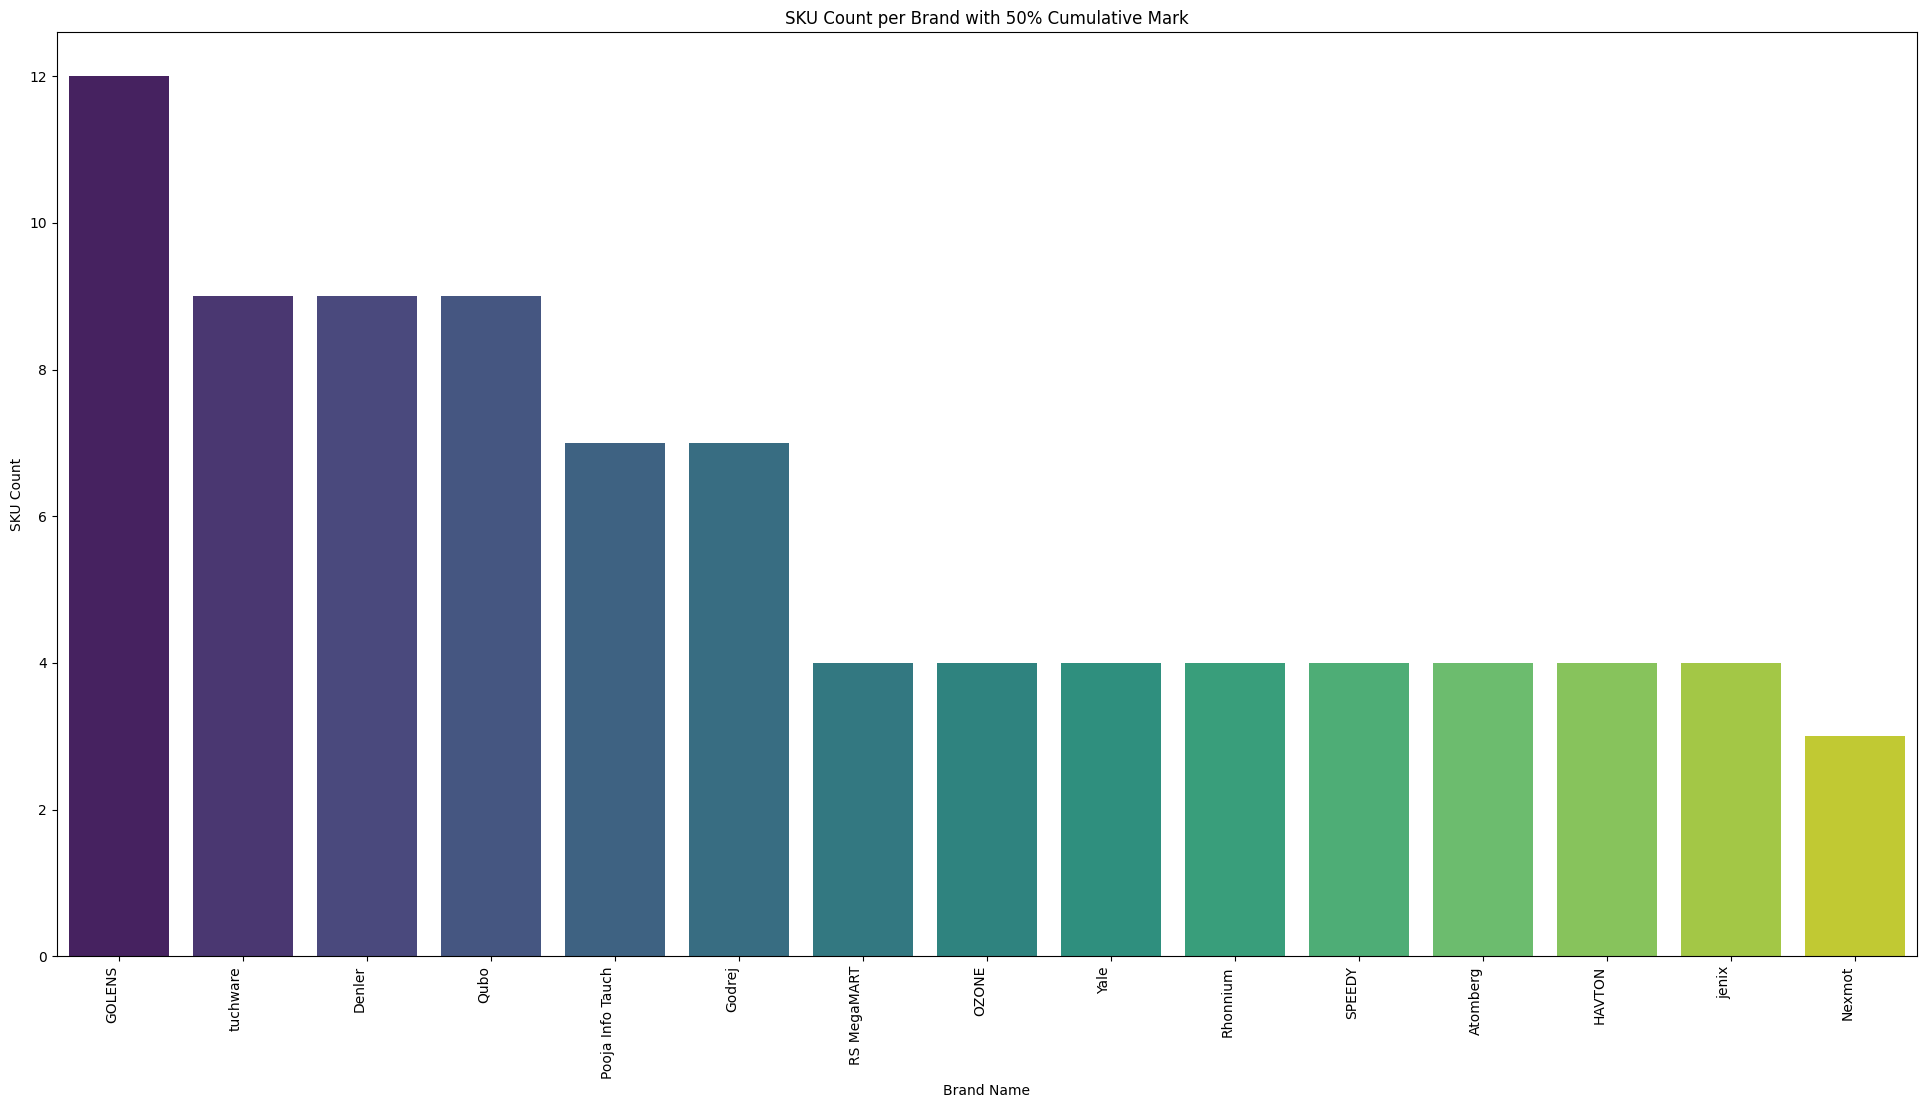

In [10]:
# Plot SKU distribution, focusing on the cumulative percentage
plt.figure(figsize=(24, 12))
sns.barplot(data=top_brands, x='Brand_Name', y='SKU_Count', palette='viridis')
#plt.axvline(x=top_brands['Cumulative_SKUs'].max(), color='red', linestyle='--')
plt.title('SKU Count per Brand with 50% Cumulative Mark')
plt.xlabel('Brand Name')
plt.ylabel('SKU Count')
plt.xticks(rotation=90, ha="right") 
plt.show()

<h1>c. Relative ranking</h1>

In [11]:
df.columns

Index(['Brand_Name', 'Price (Rupee)', 'Rating', 'Rating_Count', 'Review_Count',
       'Ranking'],
      dtype='object')

In [12]:
# If Rating is null, assume it as 1
# df['Rating'] = df['Rating'].fillna(1)
df['Rating'] = df['Rating'].dropna()
# Calculate the score for each SKU
#df['Score'] = (df['Rating'] *df['Price (Rupee)'])/ (df['Ranking']*5)/df['Price (Rupee)'].max()
df['Score'] = (df['Rating'] *df['Price (Rupee)'])/((5)*df['Price (Rupee)'].max())
# Sum the scores for each brand
brand_scores = df.groupby('Brand_Name')['Score'].sum().reset_index()

# Sort the brands by score in descending order (higher score is better)
brand_scores = brand_scores.sort_values(by='Score', ascending=False).reset_index(drop=True)

# Assign ranks based on the score
brand_scores['Relative_Rank'] = np.arange(1, len(brand_scores) + 1)

brand_scores = brand_scores[brand_scores["Brand_Name"].isin(["Atomberg","SPEEDY"])]
# brand_scores = brand_scores[brand_scores["Brand_Name"] == "SPEEDY"]

brand_scores


#price

,Brand_Name,Score,Relative_Rank
8,Atomberg,0.847818,9
16,SPEEDY,0.369365,17


<h1>d. Relative rating:</h1>

In [13]:
df['Rating'] = df['Rating'].fillna(1)

# Calculate the score for each SKU
df['Score'] = df['Rating'] / df['Ranking']

# Sum the scores for each brand
brand_scores = df.groupby('Brand_Name')['Score'].sum().reset_index()

# Normalize the scores between 0 and 5
min_score = brand_scores['Score'].min()
max_score = brand_scores['Score'].max()
brand_scores['Relative_Rating'] = ((brand_scores['Score'] - min_score) / (max_score - min_score)) * 5
brand_scores = brand_scores.sort_values(by="Relative_Rating", ascending=False).reset_index(drop=True)

brand_scores

,Brand_Name,Score,Relative_Rating
0,SPEEDY,4.469054,5.000000
1,Atomberg,2.276190,2.543946
2,BonKaso,1.550000,1.730597
3,Godrej,1.415052,1.579451
4,VALENCIA,1.397748,1.560071
...,...,...,...
76,Prosafe,0.011616,0.007573
77,DHARAM SHAKTI,0.010268,0.006063
78,V I R,0.005263,0.000458
79,SOLITY,0.005128,0.000307


<h1>e. Price distribution of SKUs</h1>

In [14]:
# Define the price bands
price_bins = [-float('inf'), 2999, 4999, 9999, 14999, 19999, float('inf')]
price_labels = ['<INR 3000', 'INR 3000-4999', 'INR 5000-9999', 'INR 10000-14999', 'INR 15000-19999', 'Greater than 20000']

# Categorize prices into bins
df['Price_Band'] = pd.cut(df['Price (Rupee)'], bins=price_bins, labels=price_labels, right=True)

# Count the number of SKUs in each price band
price_distribution = df['Price_Band'].value_counts().reindex(price_labels).reset_index()
price_distribution.columns = ["Price_Band", "No. of SKUs"]
std_deviation = price_distribution['No. of SKUs'].std()
mean = price_distribution['No. of SKUs'].mean()
print(std_deviation,mean)
price_distribution


12.355835328567093 29.333333333333332


,Price_Band,No. of SKUs
0,<INR 3000,34
1,INR 3000-4999,12
2,INR 5000-9999,49
3,INR 10000-14999,32
4,INR 15000-19999,24
5,Greater than 20000,25


C:\Users\HP_Sharma\AppData\Local\Temp\ipykernel_24484\4168897012.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=price_distribution["Price_Band"], y=price_distribution["No. of SKUs"], palette='viridis')


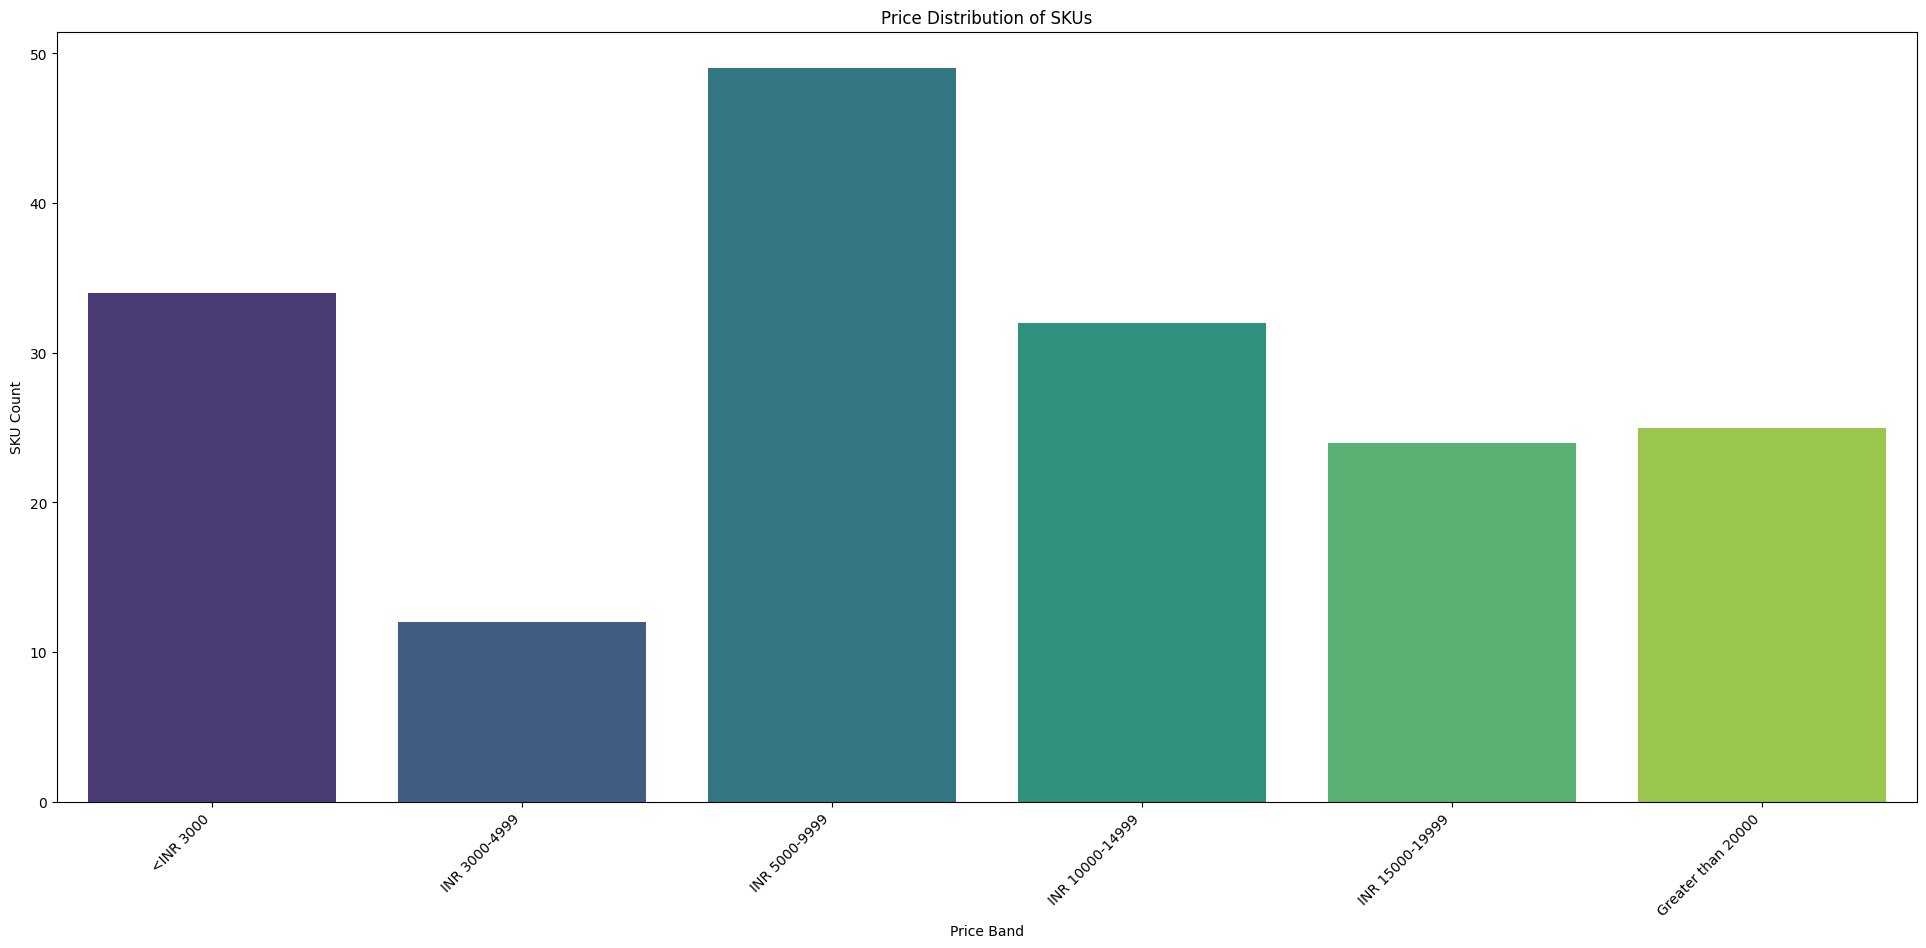

In [15]:
plt.figure(figsize=(24, 10))
sns.barplot(x=price_distribution["Price_Band"], y=price_distribution["No. of SKUs"], palette='viridis')
plt.title('Price Distribution of SKUs')
plt.ylabel('SKU Count')
plt.xlabel('Price Band')
plt.xticks(rotation=45, ha="right") 
plt.show()


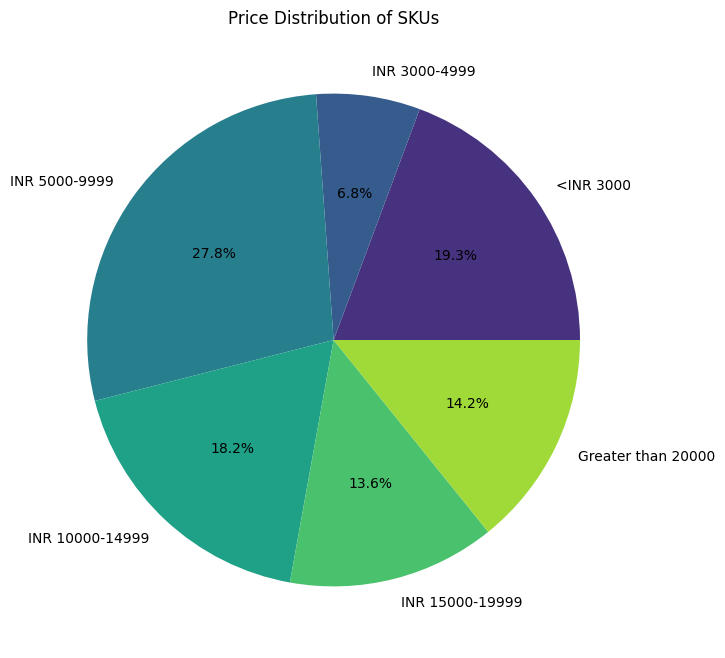

In [16]:
plt.figure(figsize=(8, 8))
plt.pie(price_distribution["No. of SKUs"], labels=price_distribution["Price_Band"], autopct='%1.1f%%', colors=sns.color_palette('viridis', len(price_distribution)))
plt.title('Price Distribution of SKUs')
plt.show()
